# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [19]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Task: Normalize the data to have pixel values between 0 and 1
# Your code here

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Visualize 5 random images from the training set with their labels.

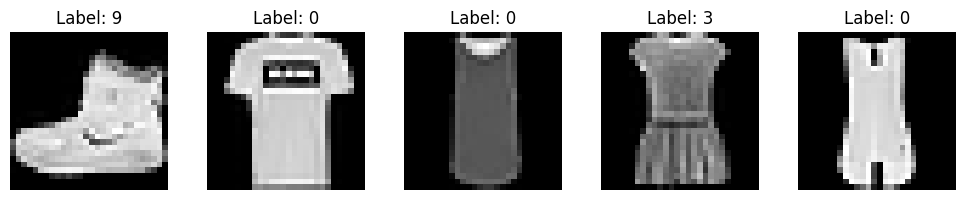

In [11]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Reshape the data to include a channel dimension and confirm the new shape.

In [13]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Confirm the new shapes
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),

    Dense(10, activation='softmax')
])

Compile your model with an appropriate optimizer, loss function, and metric.

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [17]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7713 - loss: 0.6380 - val_accuracy: 0.8700 - val_loss: 0.3644
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 93s 39ms/step - accuracy: 0.8842 - loss: 0.3187 - val_accuracy: 0.8957 - val_loss: 0.2935
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 28ms/step - accuracy: 0.8985 - loss: 0.2736 - val_accuracy: 0.8965 - val_loss: 0.2837
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9129 - loss: 0.2336 - val_accuracy: 0.9078 - val_loss: 0.2520
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - accuracy: 0.9215 - loss: 0.2071 - val_accuracy: 0.9057 - val_loss: 0.2593
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 30ms/step - accuracy: 0.9312 - loss: 0.1858 - val_accuracy: 0.9098 - val_loss: 0.2603
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9411 - loss: 0.1566 - val_accuracy: 0.9086 - val_loss: 0.2479
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9495 -

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8233 - loss: 95.2714
Test accuracy: 0.8260


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


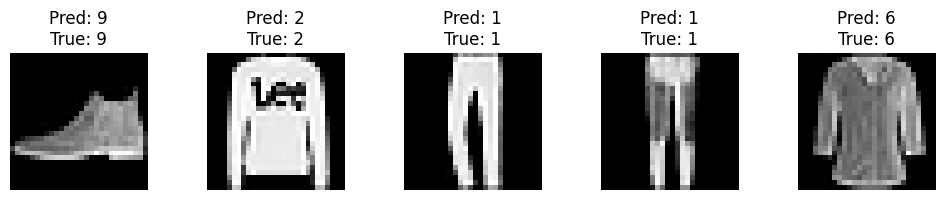

In [21]:
pred_probs = model.predict(x_test)

pred_classes = np.argmax(pred_probs, axis=1)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Construct a confusion matrix to visualize how well your model performed across different classes.

In [22]:
cm = confusion_matrix(y_test, pred_classes)

print(cm)


[[660   0  32   8  21   0 237   0  42   0]
 [  8 972   1   4   6   0   6   0   3   0]
 [  6   0 610   2 257   0 119   0   6   0]
 [ 41  22  15 708  67   0  99   0  48   0]
 [  1   0  13   7 943   0  27   0   9   0]
 [  2   0   2   0   0 977   1   6   7   5]
 [ 38   0  40   5 241   0 635   0  41   0]
 [ 14   0   8   0   5  48   2 860   8  55]
 [  4   0   1   0   8   1  26   0 959   1]
 [  0   0   0   0   9  18   0  27  10 936]]
